In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,LassoCV, RidgeCV, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = load_boston()
col_names = data["feature_names"]
X, y = data["data"], data["target"]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [4]:
data_f = pd.DataFrame(X, columns=col_names)
data_f

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data_f.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
data_f.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

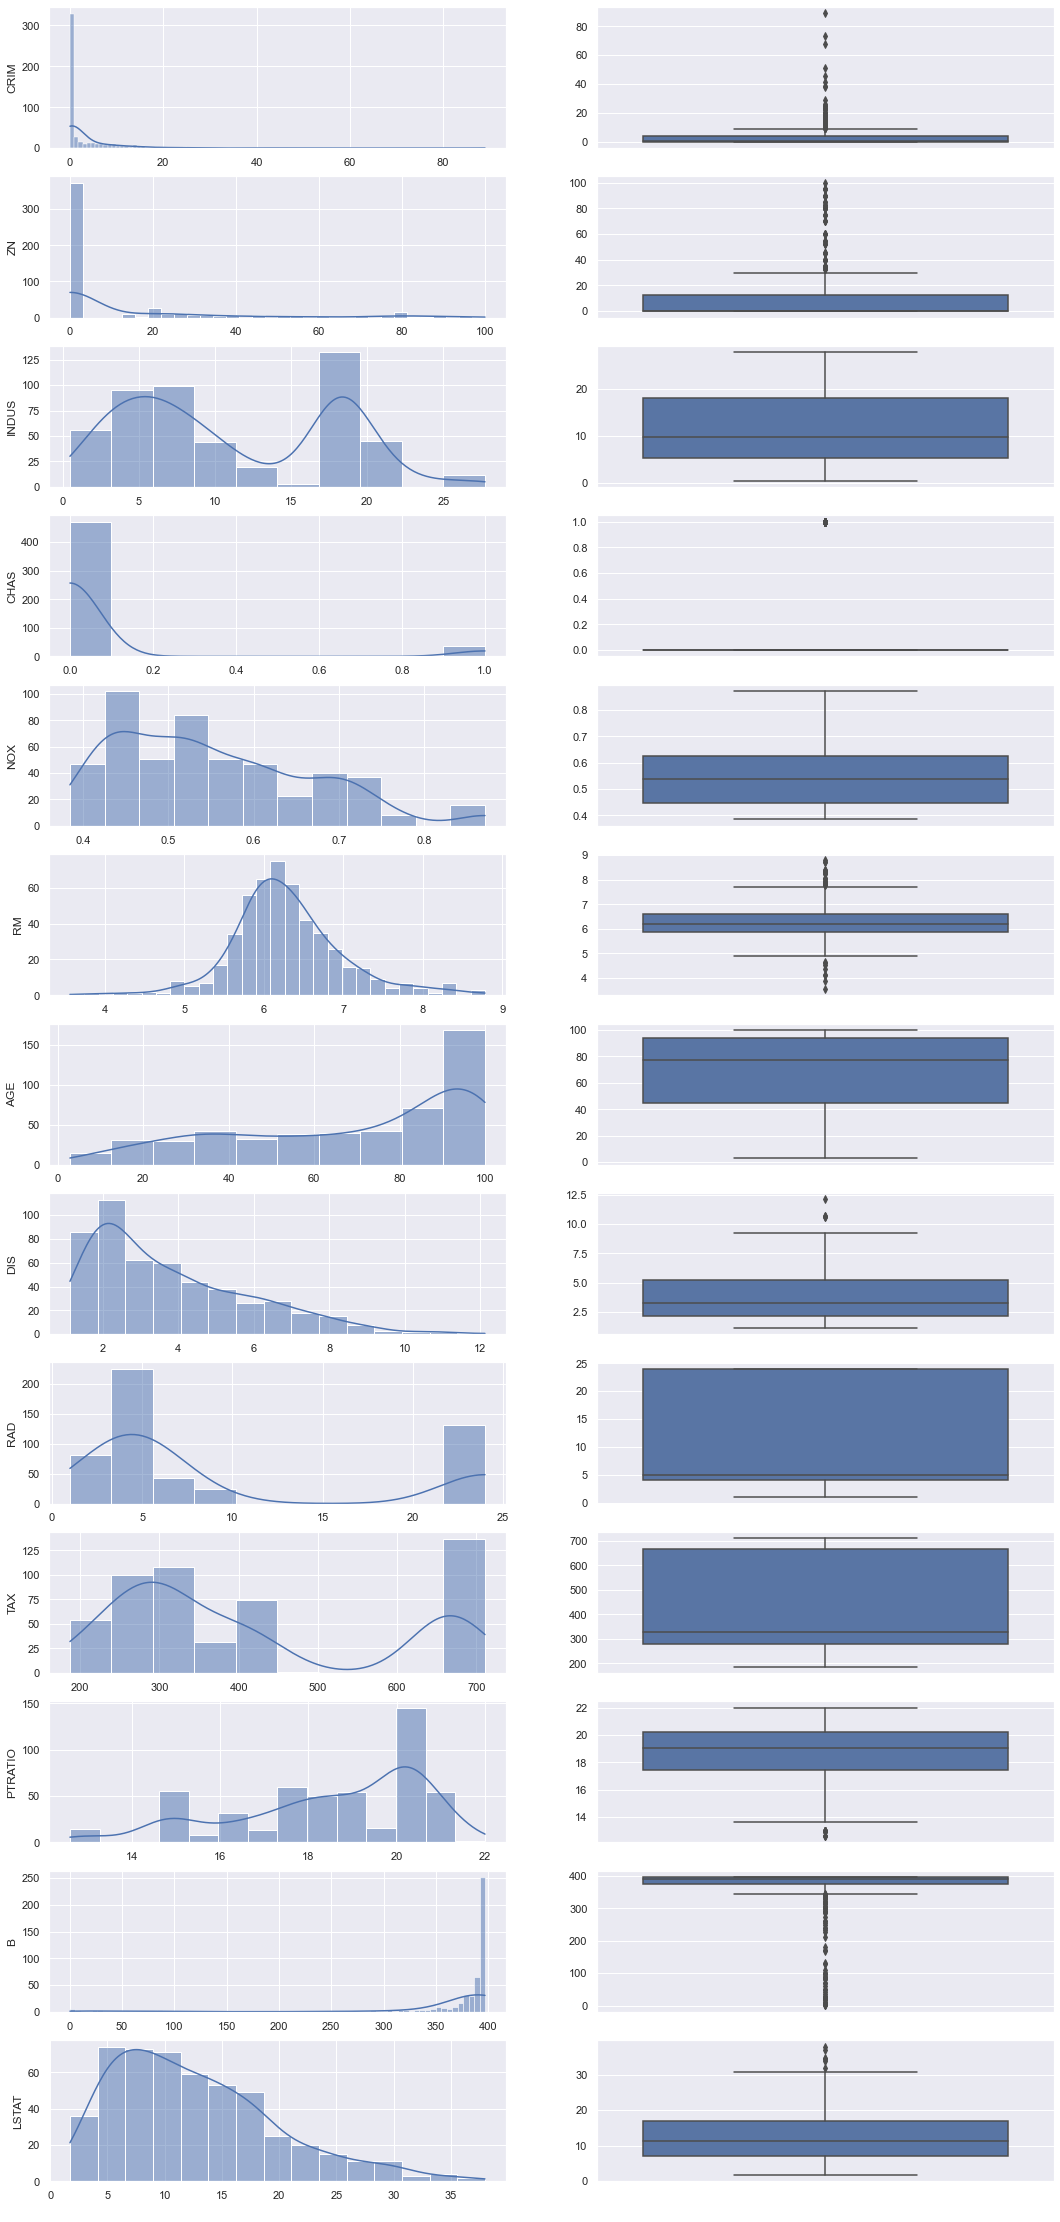

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=data_f.shape[1], figsize=(18, 40))

for col in np.arange(0, data_f.shape[1]):
    sns.histplot(data=data_f, x=data_f.iloc[:,col], kde=True, ax=ax[col,0])
    sns.boxplot(data=data_f, y=data_f.iloc[:,col], ax=ax[col,1])
    
    ax[col,0].set_xlabel(' ')
    ax[col,0].set_ylabel(data_f.columns[col])
    ax[col,1].set_ylabel(' ')

<AxesSubplot:>

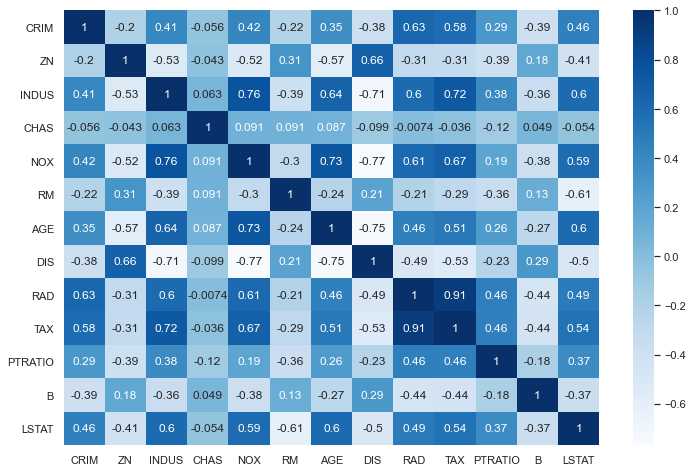

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data_f.corr(), annot=True, cmap='Blues')

In [10]:
data_f.corr()[abs(data_f.corr())>0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,0.582764,NaN,NaN,NaN
ZN,NaN,1.000000,-0.533828,NaN,-0.516604,NaN,-0.569537,0.664408,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,-0.533828,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,0.595129,0.720760,NaN,NaN,0.603800
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,-0.516604,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,0.590879
RM,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808
AGE,NaN,-0.569537,0.644779,NaN,0.731470,NaN,1.000000,-0.747881,NaN,0.506456,NaN,NaN,0.602339
DIS,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,-0.534432,NaN,NaN,NaN
RAD,0.625505,NaN,0.595129,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN
TAX,0.582764,NaN,0.720760,NaN,0.668023,NaN,0.506456,-0.534432,0.910228,1.000000,NaN,NaN,0.543993


<AxesSubplot:xlabel='feature', ylabel='correlation'>

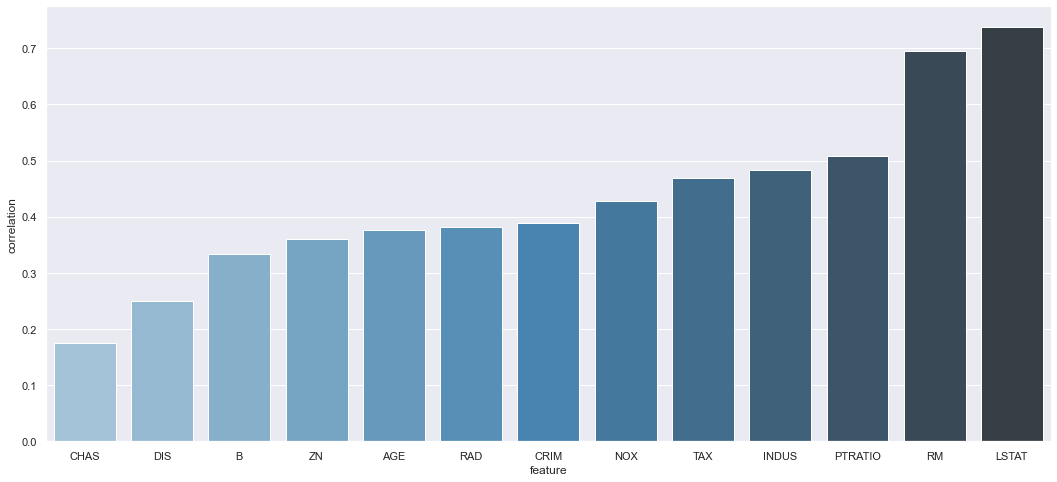

In [11]:
#Correlation with target
plt.figure(figsize=(18,8))
corr_w_target=abs(data_f.corrwith(pd.Series(y)))
corr_w_target=pd.DataFrame(corr_w_target, columns=["correlation"])
corr_w_target["feature"]=corr_w_target.index
corr_w_target=corr_w_target.sort_values("correlation")
sns.barplot(data=corr_w_target,x=corr_w_target["feature"], y=corr_w_target["correlation"],palette='Blues_d')

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.array(data_f))
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=123)

In [13]:
lin_regr = LinearRegression().fit(X_train, y_train)
y_pred=lin_regr.predict(X_test)
print(mean_squared_error(y_test, y_pred), lin_regr.coef_)

28.192485758469566 [-0.84893379  1.10678444  0.45884096  0.32213719 -1.79082931  3.03208354
 -0.02756333 -2.87351326  2.4749562  -2.14728964 -1.97569572  0.65900209
 -3.8794005 ]


In [14]:
mse_scores=[]
lin_regr = LinearRegression()
for var in np.arange(1,X_train.shape[1]+1):
    y_pred=lin_regr.fit(X_train[:,0:var], y_train).predict(X_test[:,0:var])
    score=mean_squared_error(y_test, y_pred)
    mse_scores.append(score)
    print("For additional variable {} mse is {}".format(data_f.columns[var-1], round(score,3)))

For additional variable CRIM mse is 71.149
For additional variable ZN mse is 64.603
For additional variable INDUS mse is 63.354
For additional variable CHAS mse is 54.503
For additional variable NOX mse is 54.325
For additional variable RM mse is 41.179
For additional variable AGE mse is 41.203
For additional variable DIS mse is 36.305
For additional variable RAD mse is 36.514
For additional variable TAX mse is 36.302
For additional variable PTRATIO mse is 33.183
For additional variable B mse is 31.959
For additional variable LSTAT mse is 28.192


In [15]:
ridge_regr = RidgeCV(alphas=np.linspace(0.01,10,200)).fit(X_train, y_train)
y_pred_ridge = Ridge(alpha=ridge_regr.alpha_).fit(X_train, y_train).predict(X_test)
print(mean_squared_error(y_test, y_pred_ridge), ridge_regr.alpha_, ridge_regr.coef_)

28.250001360258327 6.134522613065327 [-0.80943407  1.01517373  0.29354525  0.34191163 -1.61728984  3.07433637
 -0.06763855 -2.70995998  2.06059241 -1.75765973 -1.92701137  0.65480327
 -3.77917461]


In [16]:
abs(cross_val_score(Ridge(alpha=6.135), X_train, y_train, cv=5,scoring="neg_mean_squared_error").mean())

22.476231396356567

In [17]:
lasso_regr = LassoCV(alphas=np.linspace(0.001,10,200),cv=3).fit(X_train, y_train)
y_pred_lasso=lasso_regr.predict(X_test)
print(mean_squared_error(y_test, y_pred_lasso), lasso_regr.alpha_, lasso_regr.coef_)

28.198999344125735 0.001 [-0.84637784  1.10300817  0.44974176  0.32182617 -1.78429568  3.03281946
 -0.02574628 -2.86800733  2.45847579 -2.13134407 -1.97365166  0.65756248
 -3.87939835]


In [18]:
abs(cross_val_score(Lasso(alpha=0.001), X_train, y_train, cv=5,scoring="neg_mean_squared_error").mean())

22.585454534659085

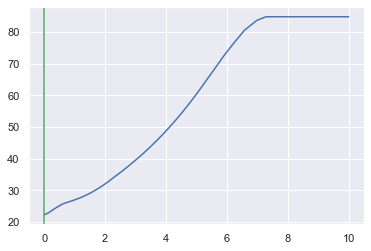

In [19]:
plt.plot(lasso_regr.alphas_,lasso_regr.mse_path_.mean(1))
plt.axvline(lasso_regr.alpha_,c='g')

In [20]:
dec_regr = DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_leaf=10, random_state=123).fit(X_train, y_train)
y_pred_dec = dec_regr.predict(X_test)
mean_squared_error(y_test, y_pred_dec)

28.53294111169297

In [21]:
params = {
    "max_depth": np.arange(1,11),
    "min_samples_leaf": np.arange(2,16)
}
grid_dec = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=5)
grid_dec.fit(X_train,y_train)
grid_dec.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

In [22]:
dec_regr = DecisionTreeRegressor(criterion="squared_error", max_depth=6, min_samples_leaf=10, random_state=123).fit(X_train, y_train)
y_pred_dec = dec_regr.predict(X_test)
mean_squared_error(y_test, y_pred_dec)

28.51946331734322

In [23]:
forest_regr = RandomForestRegressor(max_depth=5, min_samples_leaf=10).fit(X_train, y_train)
y_pred = forest_regr.predict(X_test)
mean_squared_error(y_test, y_pred)

26.005023362856424

In [24]:
gs_cv = GridSearchCV(RandomForestRegressor(random_state=123),param_grid=params,cv=5).fit(X_train, y_train)
gs_cv.best_params_

{'max_depth': 9, 'min_samples_leaf': 2}

In [25]:
forest_regr = RandomForestRegressor(max_depth=9, min_samples_leaf=2).fit(X_train, y_train)
y_pred = forest_regr.predict(X_test)
mean_squared_error(y_test, y_pred)

20.685075703458125